# Data Visualisation

## Objectives

Providing the client the required visual aid to understand the differences in images for the different labels: Normal, CNV, DME, DRUNSEN, which represent different conditions. This will satisfy bussiness requirement 1.

## Inputs

The notebook requires images divided in the following folders:

1. inputs/OCTdata/train
2. inputs/OCTdata/val
3. inputs/OCTdata/test

## Outputs

1. Image shape embeddings pickle file.
2. Mean and variability of images per label plot.
3. Plot to distinguish the contrast between parasite-contained and uninfected cell images.
4. Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.

---

## Set Directory

### Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread

Finding the curent working directory

In [2]:
working_dir = os.getcwd()
working_dir

'/workspace/OCTreader/jupiter_notebooks'

Moving it to the workspace directory

In [3]:
os.chdir('/workspace/OCTreader')
working_dir = os.getcwd()
working_dir

'/workspace/OCTreader'

Now we define paths for the train, val, test folders

In [4]:
split_dirs = os.listdir('inputs/OCTdata')
split_paths = {
    split_dirs[0]: 'inputs/OCTdata/' + split_dirs[0],
    split_dirs[1]: 'inputs/OCTdata/' + split_dirs[1],
    split_dirs[2]: 'inputs/OCTdata/' + split_dirs[2]
}
labels = os.listdir(split_paths[split_dirs[0]])

### Set output directory

In [5]:
ver = 'v1'
output_path = 'outputs/' + ver

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print(f'version {ver1} already exists, please choose another version')
else:
    os.makedirs(output_path)

## Data visualisation of images

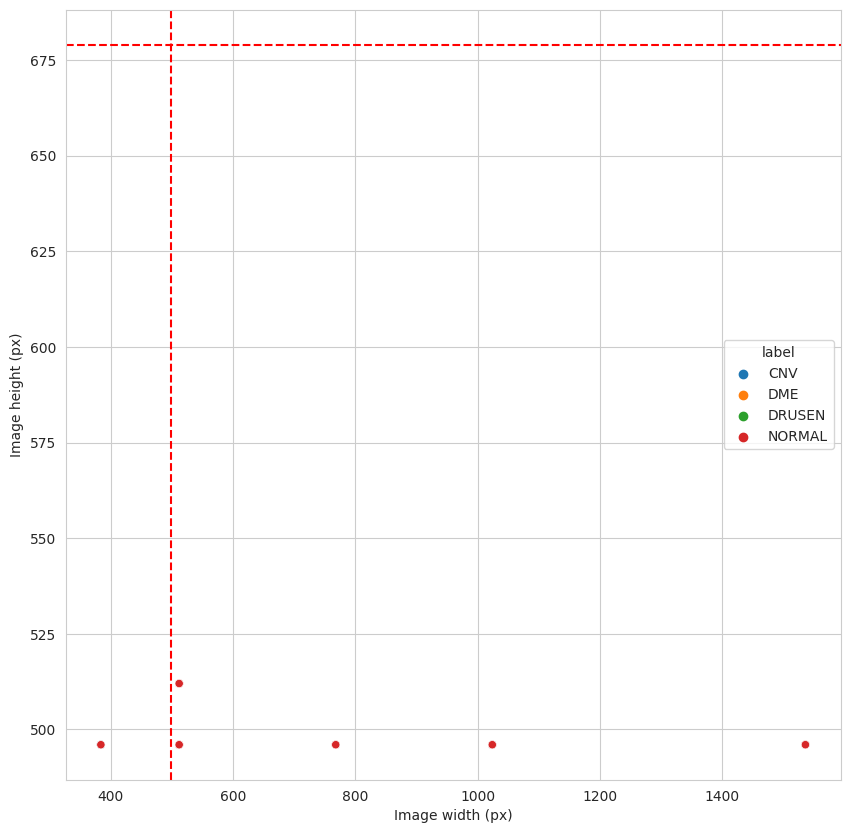

In [6]:
def average_image_shape():
    '''
    Function stores the image shape in df
    calculates mean shape size
    '''
    df = pd.DataFrame(columns=['dim1', 'dim2', 'label'])
    for label in labels:
        label_path = split_paths['train'] + '/' + label
        for image_name in os.listdir(label_path):
            img = imread(label_path + '/' + image_name)
            dim1, dim2 = img.shape
            new_row = {'dim1': dim1, 'dim2': dim2, 'label': label}
            df = df.append(new_row, ignore_index=True)
    means = (df[['dim1', 'dim2']].mean().values.tolist())
    
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(figsize=(10, 10))
    sns.scatterplot(data=df, x='dim2', y='dim1', hue='label')
    axes.set_xlabel('Image width (px)')
    axes.set_ylabel('Image height (px)')
    axes.axvline(x=int(means[1]), color='r', linestyle='--')
    axes.axhline(y=int(means[0]), color='r', linestyle='--')
    plt.show()
    return [int(means[0]), int(means[1])], df



img_avg_size, df_image_shape = average_image_shape()

In [10]:
img_avg_size.append(3)

joblib.dump(value=img_avg_size,
            filename=f"{output_path}/image_shape.pkl")


['outputs/v1/image_shape.pkl']

## Average and stadard deviation of data per label

We start by creating an array for images

In [45]:
from tensorflow.keras.preprocessing import image
import random
def create_image_tensor(data_dir, new_height, new_width, n_images):
    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    new_image_size = (new_height, new_width)
    for label in labels:
        label_path = f'{data_dir}/{label}'
        label_images = os.listdir(label_path)
        random.shuffle(label_images)
        for i in range(n_images):
            img = image.load_img(f'{label_path}/{label_images[i]}', target_size=new_image_size)
            img_array = image.img_to_array(img)
            if img_array.max()>1:
                resized_img = img_array / 255
            else:
                resized_img = img_array
            
            X = np.append(X, resized_img).reshape(-1, new_image_size[0], new_image_size[1], 3)
            y = np.append(y, label)

    return X, y


X, y = create_image_tensor(split_paths['train'], img_avg_size[0], img_avg_size[1], 10)
print(X.shape, y.shape)

(40, 498, 679, 3) (40,)


### Plot and save average and standard deviation of images per label

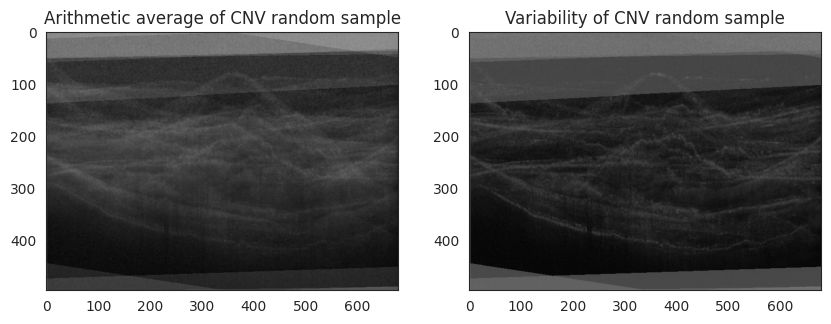

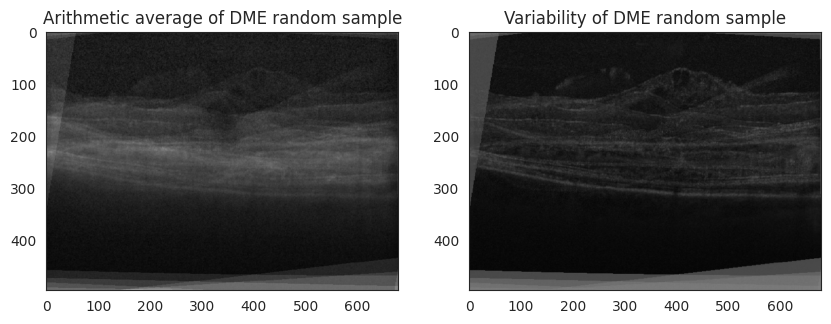

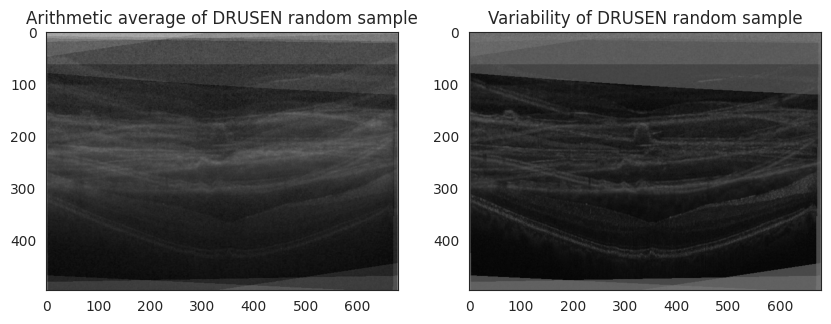

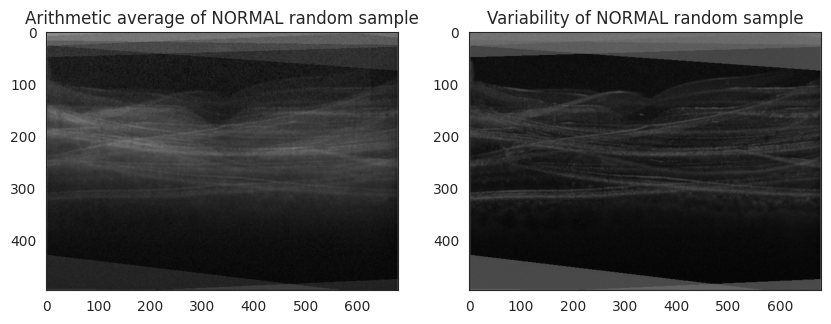

In [47]:

def plot_mean_deviation_per_label():
    sns.set_style("white")
    for label in labels:
        X_label = X[y == label]
        img_mean = np.mean(X_label, axis=0)
        img_std = np.std(X_label, axis=0)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 15))
        axes[0].set_title(f'Arithmetic average of {label} random sample')
        axes[0].imshow(img_mean)
        axes[1].set_title(f'Variability of {label} random sample')
        axes[1].imshow(img_std)

plot_mean_deviation_per_label()